In [2]:
import numpy as np
import itertools
import reedsolo
import matplotlib.pyplot as plt

transmitted signal clipped [[154.7653718  118.7653718  118.7653718  103.85368356 154.7653718
  118.7653718  118.7653718  205.67706005 154.7653718  129.30952768
   82.7653718  144.22121593 154.7653718  180.22121593 154.7653718
   93.30952768 190.7653718  144.22121593 118.7653718  180.22121593
  118.7653718   93.30952768 118.7653718  129.30952768 118.7653718
   67.85368356 154.7653718  154.7653718  118.7653718  169.67706005
  154.7653718  154.7653718  154.7653718  144.22121593 154.7653718
  180.22121593  82.7653718   93.30952768 154.7653718  129.30952768
  154.7653718  144.22121593 154.7653718  129.30952768 154.7653718
   93.30952768  82.7653718  180.22121593 190.7653718  118.7653718
   82.7653718  154.7653718  118.7653718  118.7653718  154.7653718
  154.7653718  118.7653718  144.22121593 118.7653718  180.22121593
  190.7653718   93.30952768 118.7653718  129.30952768 154.7653718
  180.22121593 154.7653718  144.22121593  82.7653718  129.30952768
  154.7653718   93.30952768 154.7653718  18

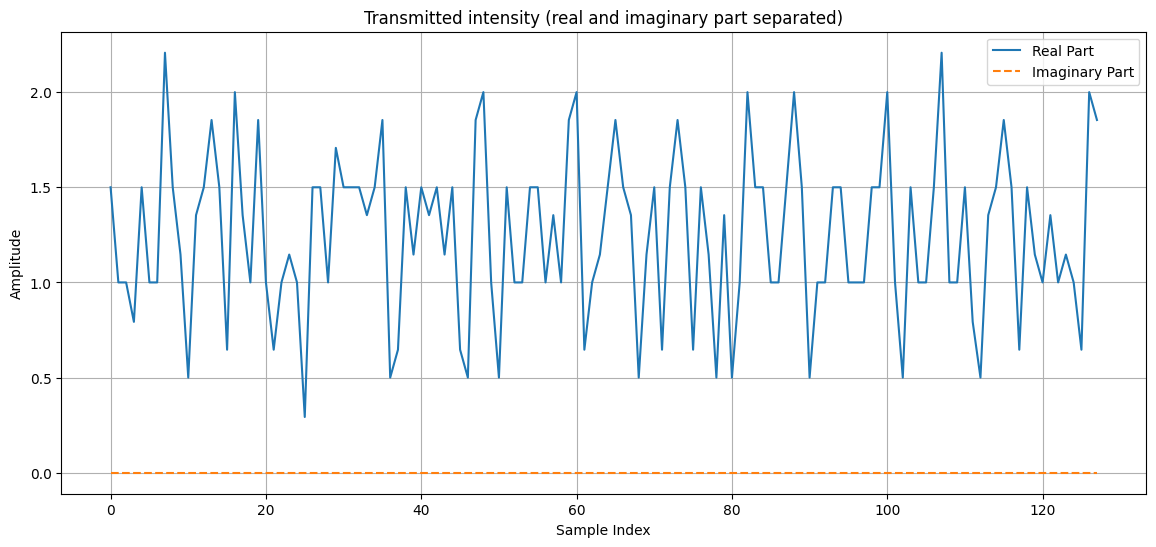

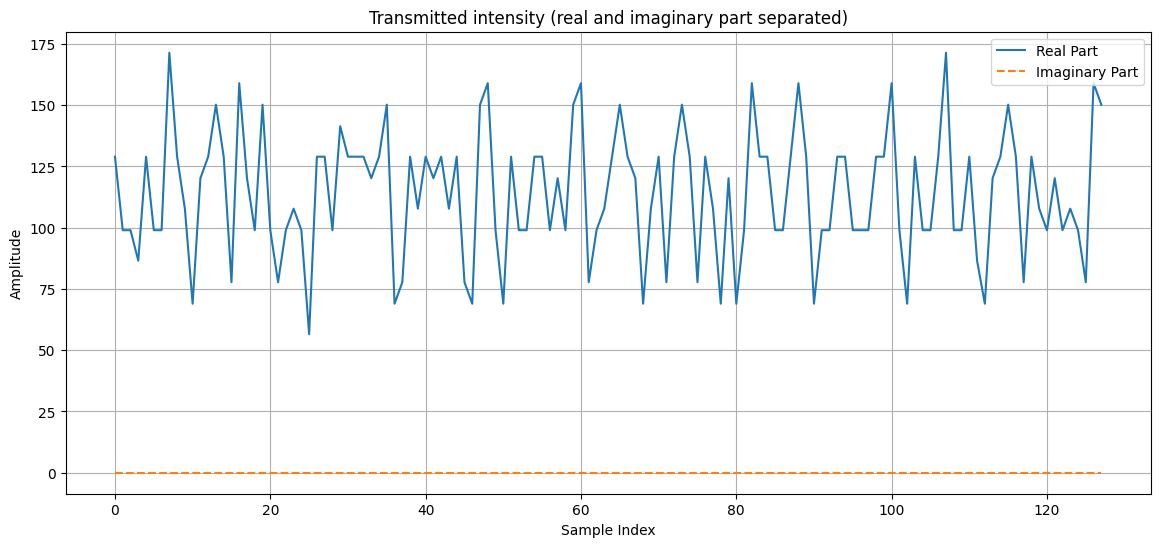

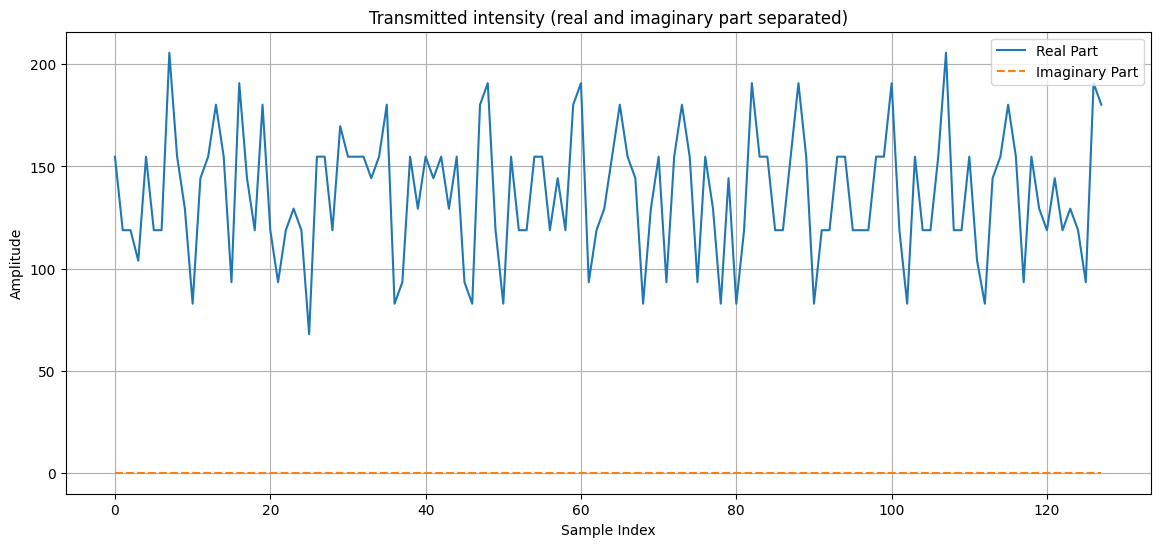

(12,)
Bitstream: [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
FEC Encoded binary data: 01100101011011010110100101101110011010000111010001110101011100100010000000110000011000010110100000110101011000111011010011101111
Manchester encoded bitstream: [1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1
 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0
 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1

In [3]:

# Function to apply Manchester encoding
def manchester_encode(bits):
    encoded_bits = []
    for bit in bits:
        if bit == 1:
            encoded_bits.extend([0, 1])  # Manchester for 1: low-high
        else:
            encoded_bits.extend([1, 0])  # Manchester for 0: high-low
    return np.array(encoded_bits)

def string_to_bits(s):
    """ string to a list of bits."""
    return list(itertools.chain.from_iterable([list(map(int, f"{ord(c):08b}")) for c in s]))

# def bits_to_string(bits):
#     """Convert a list of bits back to a string."""
#     chars = [chr(int(''.join(map(str, bits[i:i + 8])), 2)) for i in range(0, len(bits), 8)]
#     return ''.join(chars)

def binary_to_bytes(binary_str):
    """ binary string to bytes."""
    byte_array = bytearray()
    for i in range(0, len(binary_str), 8):
        byte_array.append(int(binary_str[i:i+8], 2))
    return bytes(byte_array)

def bytes_to_binary(byte_array):
    """ bytes to a binary string."""
    return ''.join(f'{byte:08b}' for byte in byte_array)

def binary_to_qam16(bits):
    """binary list to QAM-16 symbols."""
    M = 4  # QAM-4
    bits_per_symbol = int(np.log2(M))  # 4 bits per QAM-16 symbol
    
    pad_length = (bits_per_symbol - len(bits) % bits_per_symbol) % bits_per_symbol
    padded_bits = np.append(bits, [0] * pad_length)

    # # QAM-16 mapping
    # mapping = {
    #     '0000': -3-3j, '0001': -3-1j, '0010': -3+3j, '0011': -3+1j,
    #     '0100': -1-3j, '0101': -1-1j, '0110': -1+3j, '0111': -1+1j,
    #     '1000':  3-3j, '1001':  3-1j, '1010':  3+3j, '1011':  3+1j,
    #     '1100':  1-3j, '1101':  1-1j, '1110':  1+3j, '1111':  1+1j
    # }
    
    mapping = {
        '00':  1+1j,  # Symbol 1
        '01':  1-1j,  # Symbol 2
        '11': -1-1j,  # Symbol 3
        '10': -1+1j   # Symbol 4
    }

    symbols = []
    for i in range(0, len(padded_bits), bits_per_symbol):
        bit_group = ''.join(str(int(bit)) for bit in padded_bits[i:i+bits_per_symbol])
        symbols.append(mapping[bit_group])

    return np.array(symbols)
import numpy as np

def hermitian_symmetry(symbols):
    N = 8 

    hermitian_symmetric = np.zeros(N, dtype=complex)  # Initialize the output array of size 8
    hermitian_symmetric[0] = 10 #DC value
    hermitian_symmetric[1] = symbols[0]            # QAM symbol 1
    hermitian_symmetric[2] = symbols[1]            # QAM symbol 2
    hermitian_symmetric[3] = symbols[2]            # QAM symbol 3
    hermitian_symmetric[4] = 0                     # Nyquist frequency (Subcarrier 5) set to zero

    hermitian_symmetric[5] = np.conj(symbols[2])   # Conjugate of QAM symbol 3
    hermitian_symmetric[6] = np.conj(symbols[1])    # Conjugate of QAM symbol 2
    hermitian_symmetric[7] = np.conj(symbols[0])   # Conjugate of QAM symbol 1

    return hermitian_symmetric

# def hermitian_symmetry(symbols):
#     """Apply Hermitian symmetry to generate a 16-subcarrier OFDM symbol."""
#     N = 16  # Number of subcarriers
#     hermitian_symmetric = np.zeros(N, dtype=complex)  # Initialize the output array
#     hermitian_symmetric[0] = 0
#     # Assign QAM symbols to the subcarriers according to the specified order
#     hermitian_symmetric[1:8] = symbols[0:7]  # Subcarrier 2 to 8
#     hermitian_symmetric[8] = 0  # Nyquist frequency (Subcarrier 9) is set to 0
#     hermitian_symmetric[9] = np.conj(symbols[6])  # Subcarrier 10 is the conjugate of Subcarrier 8
#     hermitian_symmetric[10:15] = np.conj(symbols[1:6])[::-1]  # Subcarrier 11 to 15 are conjugate and reversed
#     hermitian_symmetric[15] = np.conj(symbols[0])  # Subcarrier 16 is the conjugate of Subcarrier 2

#     return hermitian_symmetric

def create_ofdm_symbols(qam_symbols, num_subcarriers=8, symbols_per_ofdm=3):
    """OFDM symbols with Hermitian symmetry."""
    num_ofdm_symbols = len(qam_symbols) // symbols_per_ofdm  # Number of OFDM symbols
    ofdm_symbols = []  
    
    for i in range(num_ofdm_symbols):
        start_idx = i * symbols_per_ofdm
        end_idx = start_idx + symbols_per_ofdm
        qam_chunk = qam_symbols[start_idx:end_idx]
        
        hermitian_symmetric_seq = hermitian_symmetry(qam_chunk)
        # print("hermitian_symmetric_seq Symbols:")
        # print(hermitian_symmetric_seq)
        time_domain_ofdm = np.fft.ifft(hermitian_symmetric_seq)
        ofdm_symbols.append(time_domain_ofdm)
    return np.array(ofdm_symbols)  

def plot_ofdm_symbols(ofdm_symbols):
    combined_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
    combined_imag = np.concatenate([ofdm.imag for ofdm in ofdm_symbols])
    plt.figure(figsize=(14, 6))
    plt.plot(combined_real, label='Real Part')
    plt.plot(combined_imag, label='Imaginary Part', linestyle='--')
    plt.title('Transmitted intensity (real and imaginary part separated)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# plot_ofdm_symbols(ofdm_symbols)

def clip_signal(x_t):
    alpha = 1.5
    sigma_x_t = np.std(x_t)
    b = alpha * sigma_x_t
    biased_signal = (x_t + b)*60 
    L = np.percentile(biased_signal, 0)
    U = np.percentile(biased_signal, 100)
    clipped_signal = np.clip(biased_signal, L, U)
    return clipped_signal

for i in range(1, 2):
    file_path = fr'D:\My File\OCC_Nov_11\Datasets_L8_8_subcarrier\1_or_message_I128\m{i}.txt'
    
    with open(file_path, 'r') as file:
        data = file.read()  
    data_array = np.array(list(data))
    #print(data_array.shape)

    bits = string_to_bits(data)
    #print ("tx bits: ", bits)
    binary_str = ''.join(map(str, bits))
    #print(f"Transmitted Signal: {list(binary_str)}") 
    data_bytes = binary_to_bytes(binary_str)
    n = 15
    k = 11
    rs = reedsolo.RSCodec(n - k)
    encoded_data = rs.encode(data_bytes)
    encoded_binary = bytes_to_binary(encoded_data)
    #print(f"FEC Encoded binary data: {encoded_binary}")
    binary_list = [int(bit) for bit in encoded_binary]
    #print(binary_list)
    qam_symbols = binary_to_qam16(binary_list)
    #print(f"QAM Symbols (one row per subcarrier):{qam_symbols}")
    ofdm_symbols = create_ofdm_symbols(qam_symbols)
    # print("Time-Domain OFDM Symbols:")
    # print(ofdm_symbols)

    tx_signal_combined_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
    #print("combine real of ofdm", tx_signal_combined_real)

    # Apply the clipping function
    clipped_signal_example = clip_signal(tx_signal_combined_real)
    clipped_signal_example = np.array([clipped_signal_example])
    transmitted_signal = clipped_signal_example*1.2

    print("transmitted signal clipped", transmitted_signal)

    plot_ofdm_symbols(ofdm_symbols)
    plot_ofdm_symbols(clipped_signal_example)
    plot_ofdm_symbols(transmitted_signal)

    normalized_signal = np.round(transmitted_signal).astype(int)
    normalized_signal = normalized_signal.reshape(-1)

    data2= "eminhtur 0ah" 
    data_array2 = np.array(list(data2))
    print(data_array2.shape)
    bits2 = string_to_bits(data2)
    print("Bitstream:", bits2)
    binary_str2 = ''.join(map(str, bits2))
    #print(f"Transmitted Signal: {list(binary_str)}") 
    data_bytes2 = binary_to_bytes(binary_str2)
    n = 15
    k = 11
    rs = reedsolo.RSCodec(n - k)
    encoded_data2 = rs.encode(data_bytes2)
    encoded_binary2 = bytes_to_binary(encoded_data2)
    print(f"FEC Encoded binary data: {encoded_binary2}")
    binary_data2 = np.array([int(bit) for bit in encoded_binary2])
    manchester_bits = manchester_encode(binary_data2)
    print("Manchester encoded bitstream:", manchester_bits)
    print("shape manchester", manchester_bits.shape)
    formatted_list1 = ', '.join(map(str, manchester_bits))
    print(f"{formatted_list1}")

    print(f"Transmitted intensity : {normalized_signal}")
    print(f"Normalized Signal Length: {len(normalized_signal)}")
    formatted_list = ', '.join(map(str, normalized_signal))
    print(f"{formatted_list}")
    file_name = fr'D:\My File\OCC_Nov_11\Datasets_L8_8_subcarrier\2_TX_message_I128\m{i}.txt'
    with open(file_name, 'w') as file:
        file.write(f"{formatted_list}")
    file_name



In [ ]:


# Count the number of 1s using NumPy
count_of_ones = np.count_nonzero(manchester_bits == 1)
count_of_ones

In [ ]:

# Find unique numbers and count them
unique_numbers = set(normalized_signal)
count_unique = len(unique_numbers)

unique_numbers, count_unique
